In [1]:
import os
import sys
import time
import h5py
import numpy as np
from glob import glob
from datetime import datetime, timedelta

In [2]:
sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/')
sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/libs/')

from namelist import *
import data_utils as du
import verif_utils as vu

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
with h5py.File(save_dir+'CNN_domain.hdf', 'r') as h5io:
    lon_GFS = h5io['lon_GFS'][...]
    lat_GFS = h5io['lat_GFS'][...] 

In [5]:
N_days = 300
grid_shape = lon_GFS.shape

q_bins_blend = np.arange(0.01, 1, 0.01)
N_bins = len(q_bins_blend)

name_NB = '/glade/campaign/cisl/aiml/ksha/NBlend_save/NB_025_2023_ini00_f{:02d}.hdf'
name_MRMS = '/glade/campaign/cisl/aiml/ksha/GFS/MRMS_6H_lead{:02d}_2023.hdf'

In [67]:
edge_left = 4
edge_right = -8
edge_bot = 2
edge_top = -1

grid_shape_cut = (grid_shape[0] - edge_bot + edge_top, grid_shape[1] - edge_left + edge_right)

In [ ]:
CRPS_NB_lead = np.empty((N_days, grid_shape_cut[0], grid_shape_cut[1]))

#LEADs = [6,]
LEADs = np.arange(6, 168, 6)

for lead in LEADs:
    CRPS_NB_lead[...] = np.nan
    
    with h5py.File(name_NB.format(lead), 'r') as h5io:
        Y_PRED = h5io['Y_PRED'][:, :, edge_bot:edge_top, edge_left:edge_right]
    Y_PRED_flat = Y_PRED.reshape(N_days, N_bins, grid_shape_cut[0]*grid_shape_cut[1])
    
    with h5py.File(name_MRMS.format(lead), 'r') as h5io:
        MRMS_lead = h5io['MRMS_lead'][:, edge_bot:edge_top, edge_left:edge_right]
    MRMS_lead_flat = MRMS_lead.reshape(N_days, grid_shape_cut[0]*grid_shape_cut[1])
    
    for d in range(N_days):
        flag_nan = np.sum(np.isnan(MRMS_lead_flat[d, :])) + np.sum(np.isnan(Y_PRED_flat[d, :]))
        if flag_nan == 0:
            crps_ = vu.CRPS_1d_from_quantiles(q_bins_blend, Y_PRED_flat[d, ...], MRMS_lead_flat[d, :][None, ...])
            CRPS_NB_lead[d, ...] = crps_[0, :].reshape(grid_shape_cut[0], grid_shape_cut[1])
        else:
            CRPS_NB_lead[d, ...] = np.nan
    
    # save
    tuple_save = (CRPS_NB_lead,)
    label_save = ['CRPS_NB',]
    du.save_hdf5(tuple_save, label_save, '/glade/work/ksha/GAN_result/', 'NB_025_CRPS_2023_ini00_f{:02d}.hdf'.format(lead))

In [ ]:
# plt.pcolormesh(CRPS_NB_lead[0, ...], cmap=plt.cm.nipy_spectral_r)
# plt.colorbar()

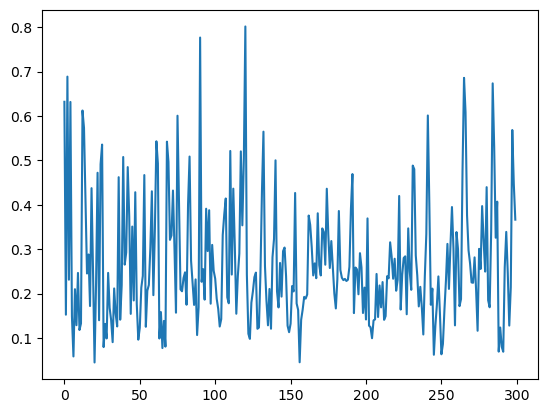

In [70]:
plt.plot(np.nanmean(CRPS_NB_lead, axis=(1, 2)))

In [71]:
np.nanmean(CRPS_NB_lead)

0.26893926619162617

In [ ]:
# tuple_save = (CRPS_climo_lead,)
# label_save = ['CRPS_climo_lead',]
# du.save_hdf5(tuple_save, label_save, result_dir, 'CRPS_MRMS_6H_lead{:02d}_Climo_2023.hdf'.format(lead))

In [60]:
Y_PRED[0, 0, edge_bot:edge_top, edge_left:edge_right]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
Y_PRED[0, 0, edge_bot:edge_top, edge_left:edge_right].shape

(102, 230)

In [53]:
Y_PRED.shape

(300, 99, 105, 242)

230

In [64]:
grid_shape[0]

105

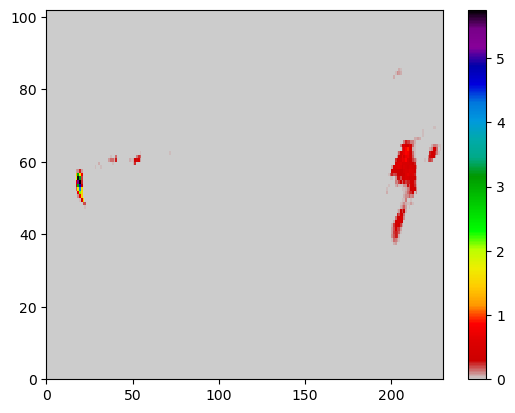

In [62]:
plt.pcolormesh(Y_PRED[0, 0, edge_bot:edge_top, edge_left:edge_right], cmap=plt.cm.nipy_spectral_r)
plt.colorbar()

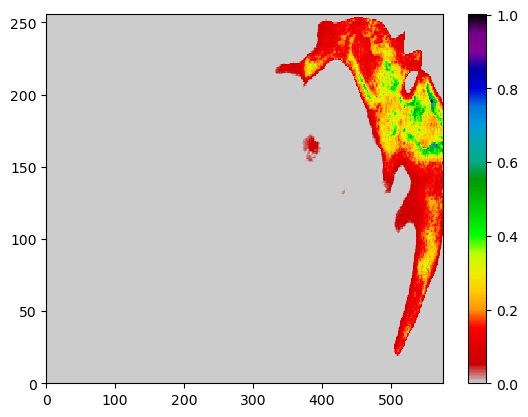

In [41]:
plt.pcolormesh(APCP_CDF[120, 20, ...]-APCP_CDF[120, 19, ...], cmap=plt.cm.nipy_spectral_r)
plt.colorbar()

In [22]:
APCP_CDF.shape

(300, 99, 256, 576)

In [ ]:
plt.plot(APCP_CDF[120, :, 210, 490])

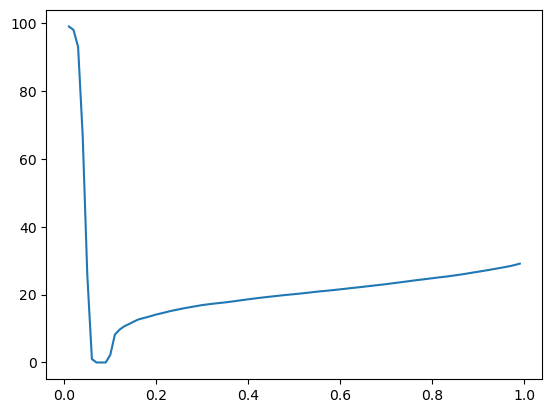

In [40]:
plt.plot(q_bins_blend, APCP_CDF[120, :, 210, 490])

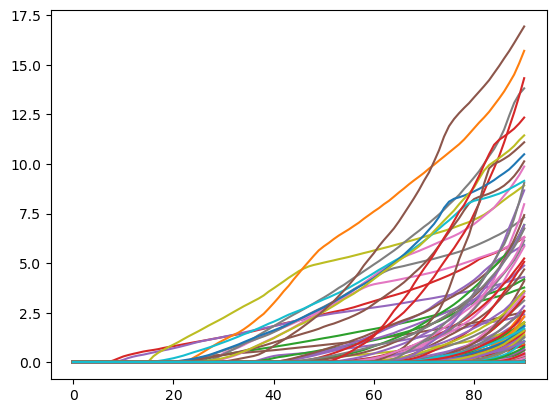

In [58]:
plt.plot(APCP_CDF[:, 8:, 100, 200].T);

## Test on CRPSS

In [36]:
CRPS_ = []

for l in np.arange(6, 168+6, 6):
    with h5py.File('/glade/work/ksha/GAN_result/NB_CRPS_2023_ini00_f{:02d}.hdf'.format(l), 'r') as h5io:
        CRPS_NB = h5io['CRPS_NB'][...]
    
    CRPS_.append(np.nanmean(CRPS_NB))

In [ ]:
with h5py.File('/glade/work/ksha/GAN_result/CRPS_MRMS_climo_2023.hdf', 'r') as h5io:
    CRPS_climo = h5io['CRPS_climo'][...]
CRPS_climo_lead = CRPS_climo[:, 1, ...]

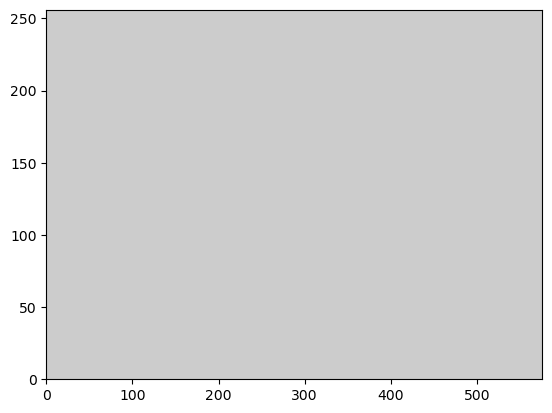

In [30]:
plt.pcolormesh(APCP_q[0, 20, ...], cmap=plt.cm.nipy_spectral_r)

In [24]:
APCP_CDF[0, 10, ...]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

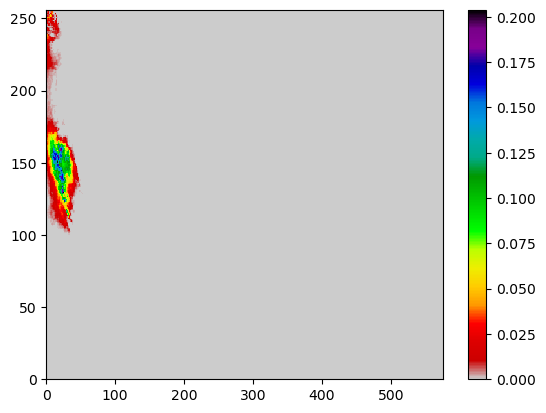

In [32]:
plt.pcolormesh(APCP_CDF[0, 50, ...], cmap=plt.cm.nipy_spectral_r)
plt.colorbar()

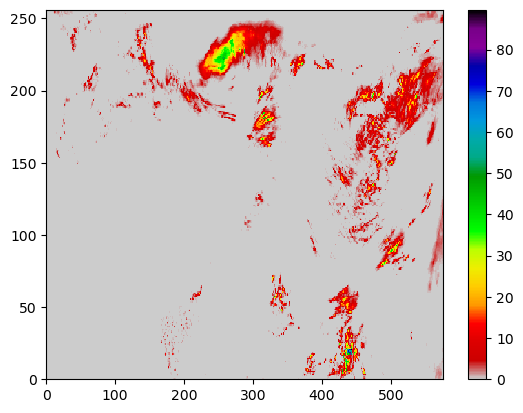

In [12]:
plt.pcolormesh(MRMS_lead[168, ...], cmap=plt.cm.nipy_spectral_r)
plt.colorbar()

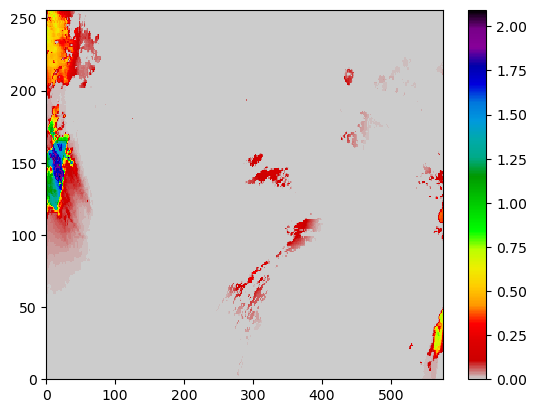

In [10]:
plt.pcolormesh(CRPS_NB_lead[0, ...], cmap=plt.cm.nipy_spectral_r)
plt.colorbar()

In [31]:
np.mean(CRPS_NB_lead[0, ...])

0.02251914886052155

In [46]:
APCP_CDF[0, :, 100, 200]

IndexError: too many indices for array: array is 3-dimensional, but 4 were indexed

In [45]:
# plt.pcolormesh(CRPS_climo[0, 1, ...], cmap=plt.cm.nipy_spectral_r)
# plt.colorbar()

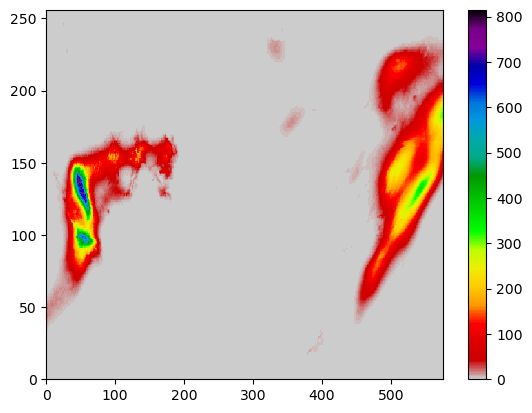

In [29]:
crps_ .shape

(1, 147456)

In [13]:
MRMS.shape

(8784, 256, 576)

In [11]:
APCP_q.shape

(300, 99, 256, 576)

In [ ]:
lead = 168
name_ = '/glade/campaign/cisl/aiml/ksha/NBlend_save/NB_2023_ini00_f{:02d}.hdf'

with h5py.File(name_.format(lead), 'r') as h5io:
    APCP_q2 = h5io['APCP_q'][...]

In [ ]:
np.nansum(APCP_q - APCP_q2)

In [ ]:
np.sum(APCP_q - APCP_q2)